<a href="https://colab.research.google.com/github/vcautela/Estatistica/blob/main/An%C3%A1lise_Descritiva_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv('/content/dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

salário min = R$788,00


### 1º Definir os intevalos das classes em reais (R$)

In [4]:
df.Renda.min()

0

In [5]:
df.Renda.max()

200000

### 2º Definir os labels das classes

In [6]:
classes = [df.Renda.min(), 1576, 3940, 11820, 19700,df.Renda.max()]

In [7]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [8]:
frequencia = pd.value_counts(
    pd.cut(x=df.Renda,
           bins=classes,
           labels=labels,
           include_lowest=True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [9]:
percentual = pd.value_counts(
pd.cut(x=df.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True), normalize=True
)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
dist_freq = pd.DataFrame({'Freq_Abs': frequencia, 'Freq_Relativa': percentual})
dist_freq

,Freq_Abs,Freq_Relativa
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: title={'center': 'Gráfico de frequência por intervalos de renda (labels)'}, xlabel='Labels', ylabel='Freq_Abs'>

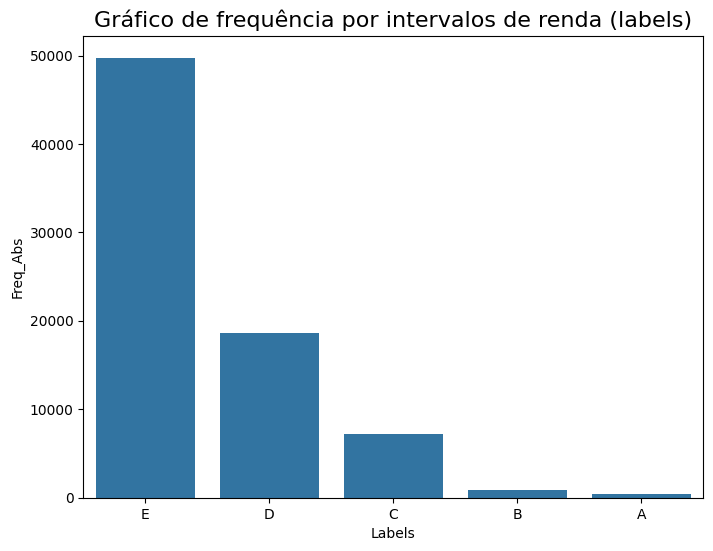

In [11]:
plt.figure(figsize=(8,6))
plt.xlabel('Labels')
plt.title('Gráfico de frequência por intervalos de renda (labels)', fontsize=16)
sns.barplot(dist_freq.reset_index(), x = 'index', y='Freq_Abs',)

> ### Conclusões

É possível observar a partir da distribuição que acontece uma queda abrupta de frequência a medida que os valores dos intervalos de renda aumenta.

~89% dos indivíduos recebem de zero até 5 Salários mínimos (label E + label D), sendo que ~65% dos indivíduos recebem de zero até 2 salários mínimos

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [12]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


<Axes: title={'center': 'Distribuição de frequência - Altura'}, xlabel='Idade', ylabel='Frequency'>

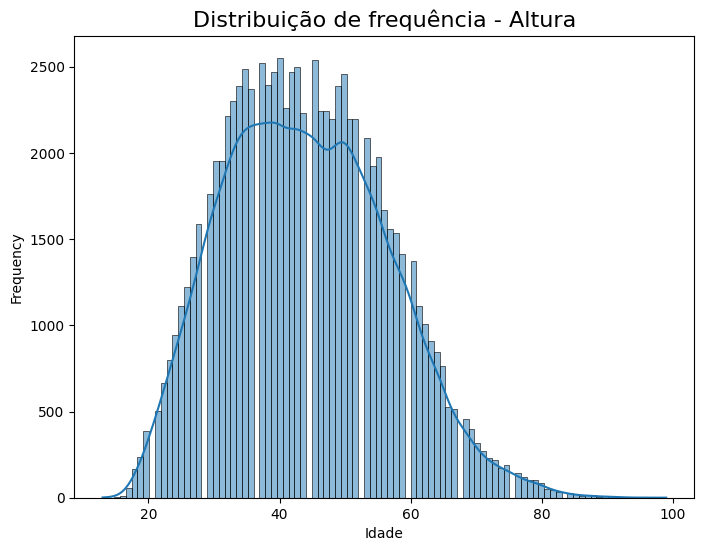

In [14]:
plt.figure(figsize=(8,6))
plt.title('Distribuição de frequência - Altura', fontsize=16)
sns.histplot(df.Idade, kde=True, stat='frequency')

<Axes: title={'center': 'Distribuição de frequência - Anos de Estudo'}, xlabel='Anos de Estudo', ylabel='Frequency'>

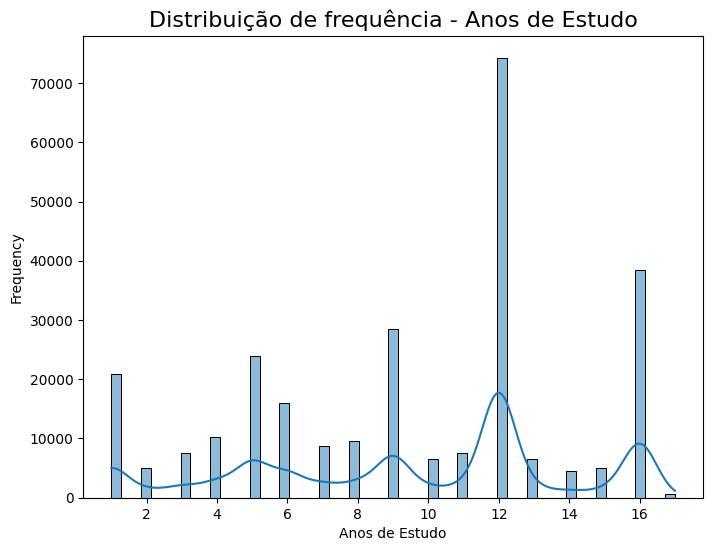

In [15]:
plt.figure(figsize=(8,6))
plt.title('Distribuição de frequência - Anos de Estudo', fontsize=16)
sns.histplot(df['Anos de Estudo'], kde=True, stat='frequency')

<Axes: title={'center': 'Distribuição de frequência - Renda'}, xlabel='Renda', ylabel='Frequency'>

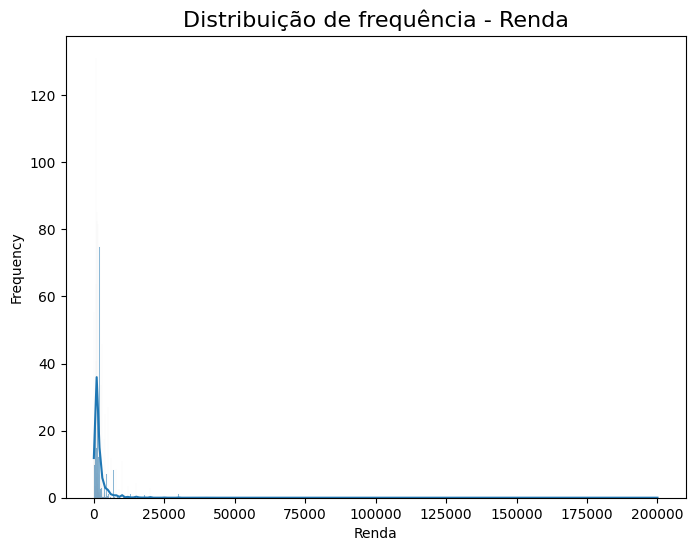

In [16]:
plt.figure(figsize=(8,6))
plt.title('Distribuição de frequência - Renda', fontsize=16)
sns.histplot(df.Renda, kde=True, stat='frequency')

<Axes: title={'center': 'Distribuição de frequência - Altura'}, xlabel='Altura', ylabel='Frequency'>

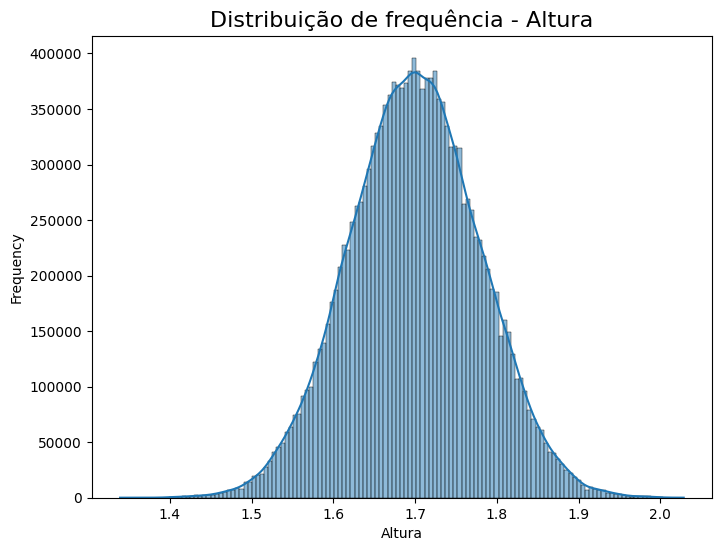

In [17]:
plt.figure(figsize=(8,6))
plt.title('Distribuição de frequência - Altura', fontsize=16)
sns.histplot(df.Altura, kde=True, stat='frequency')

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Distribuição de frequência - Renda < 20K'}, xlabel='Renda', ylabel='Frequency'>

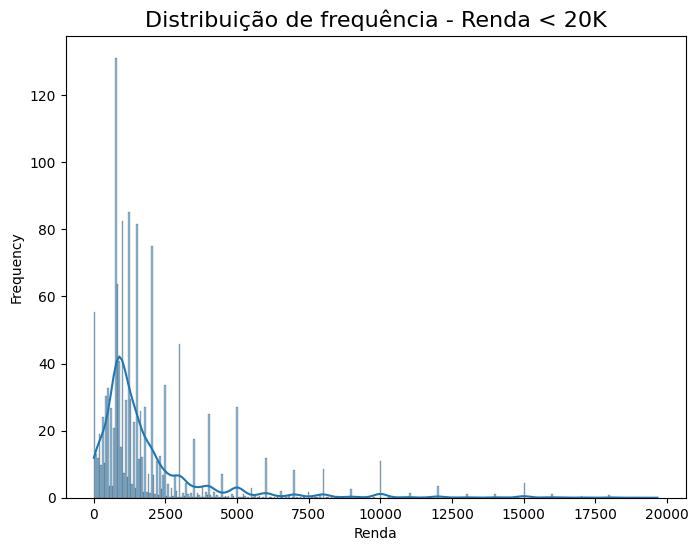

In [18]:
plt.figure(figsize=(8,6))
plt.title('Distribuição de frequência - Renda < 20K', fontsize=16)
sns.histplot(df.query('Renda <20000').Renda, kde=True, stat='frequency')

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [19]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [20]:
df.head(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790


In [21]:
freq_agg = df.groupby(['Sexo', 'Cor'])['Cor'].count()
freq_agg = pd.DataFrame(freq_agg)
freq_agg

Cor
Sexo Cor       
0    0      256
     2    22194
     4     5502
     6      235
     8    25063
1    0      101
     2     9621
     4     2889
     6      117
     8    10862

In [22]:
freq = pd.crosstab(df.Sexo, df.Cor)

freq

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [23]:
df.count()[0]

76840

In [24]:
freq_agg_rel = freq_agg / df.count()[0]
freq_agg_rel

Cor
Sexo Cor          
0    0    0.003332
     2    0.288834
     4    0.071603
     6    0.003058
     8    0.326171
1    0    0.001314
     2    0.125208
     4    0.037598
     6    0.001523
     8    0.141359

In [25]:
percentual = pd.crosstab(df.Sexo,
                         df.Cor,
                         normalize=True)

percentual

Cor,0,2,4,6,8
Sexo,,,,,
0,0.003332,0.288834,0.071603,0.003058,0.326171
1,0.001314,0.125208,0.037598,0.001523,0.141359


> ### Conclusões

Observamos tanto para homens como para mulheres um baixíssimo número de indivíduos Indígenas e Amarelos. Maior número de pessoas se declarando pardas ou brancas


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [26]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [27]:
df.Renda.median()

1200.0

### Obtenha a moda

In [28]:
df.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [29]:
df_renda = pd.DataFrame(df.Renda)
df_renda.head()

,Renda
0,800
1,1150
2,880
3,3500
4,150


In [30]:
renda_media = df_renda.mean()[0]
renda_media

2000.3831988547631

In [31]:
df_renda['Desvio_Renda'] = df_renda['Renda'] - renda_media

In [32]:
df_renda['|Desvio_Renda|'] = df_renda['Desvio_Renda'].abs()
df_renda.head()

,Renda,Desvio_Renda,|Desvio_Renda|
0,800,-1200.383199,1200.383199
1,1150,-850.383199,850.383199
2,880,-1120.383199,1120.383199
3,3500,1499.616801,1499.616801
4,150,-1850.383199,1850.383199


In [33]:
#MAD
df_renda['|Desvio_Renda|'].mean()


1526.4951371638058

### Obtenha a variância

In [34]:
variancia  = (df_renda['Desvio_Renda']**2).sum() / (len(df_renda) - 1)
variancia

11044906.006217021

In [35]:
df_renda['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [36]:
desvio_padrao = np.sqrt(variancia)
desvio_padrao

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [37]:
media_sexo_cor = pd.DataFrame(df.groupby(['Sexo', 'Cor'])['Renda'].mean())
media_sexo_cor

Renda
Sexo Cor             
0    0    1081.710938
     2    2925.744435
     4    1603.861687
     6    4758.251064
     8    1659.577425
1    0    2464.386139
     2    2109.866750
     4    1134.596400
     6    3027.341880
     8    1176.758516

In [38]:
mediana_sexo_cor = pd.DataFrame(df.groupby(['Sexo', 'Cor'])['Renda'].median())
mediana_sexo_cor

Renda
Sexo Cor        
0    0     797.5
     2    1700.0
     4    1200.0
     6    2800.0
     8    1200.0
1    0     788.0
     2    1200.0
     4     800.0
     6    1500.0
     8     800.0

In [39]:
max_sexo_cor = pd.DataFrame(df.groupby(['Sexo', 'Cor'])['Renda'].max())
max_sexo_cor

Renda
Sexo Cor        
0    0     10000
     2    200000
     4     50000
     6     50000
     8    100000
1    0    120000
     2    100000
     4     23000
     6     20000
     8     30000

In [40]:
renda_estatistica_por_sexo_cor = pd.crosstab(df.Cor,
                                             df.Sexo,
                                             values=df.Renda,
                                             aggfunc={'mean', 'median', 'max'})
renda_estatistica_por_sexo_cor.rename(index=cor, inplace=True)
renda_estatistica_por_sexo_cor.rename(columns=sexo, inplace=True)
renda_estatistica_por_sexo_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Mulheres nitidamente ganham menos, sendo reforçado o baixo salário pela cor(etnia) indígena. Pretos e pardos possuem uma média de renda similar. O salário máximo da amosta é do homem branco

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [41]:
tabela_crosstab_var = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc='var', margins=True, margins_name='Total')

tabela_crosstab_var

Cor,0,2,4,6,8,Total
Sexo,,,,,,
0,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06,1.289035e+07
1,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06,6.608310e+06
Total,4.159087e+07,1.908087e+07,3.135141e+06,2.723900e+07,4.548909e+06,1.104491e+07


In [42]:
tabela_crosstab_std = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc='std', margins=True, margins_name='Total')
tabela_crosstab_std

Cor,0,2,4,6,8,Total
Sexo,,,,,,
0,1204.093490,4750.791872,1936.309271,5740.824820,2312.087184,3590.312915
1,11957.498292,3251.013154,1349.799809,3731.173660,1596.233048,2570.663414
Total,6449.098217,4368.165306,1770.632912,5219.099832,2132.817184,3323.387730


In [43]:
tabela_crosstab_mad = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc='mad', margins=True, margins_name='Total')
tabela_crosstab_mad

<ipython-input-43-b104d2dccc1d>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  tabela_crosstab_mad = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc='mad', margins=True, margins_name='Total')
<ipython-input-43-b104d2dccc1d>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  tabela_crosstab_mad = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc='mad', margins=True, margins_name='Total')
<ipython-input-43-b104d2dccc1d>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  tabela_crosstab_mad = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc='mad', margins=True, margins_name='Total')
<ipython-input-43-b104d2dccc

Cor,0,2,4,6,8,Total
Sexo,,,,,,
0,798.910889,2261.012346,975.602482,3709.597211,1125.827704,1647.588129
1,3007.892952,1670.967106,705.453357,2549.146322,811.580946,1212.146168
Total,1353.145792,2103.131290,906.507603,3385.914062,1046.887002,1526.495137


In [44]:
dispersao_estatistica_por_sexo_cor = pd.crosstab(df.Cor,
                                             df.Sexo,
                                             values=df.Renda,
                                             aggfunc={'var', 'std', 'mad'}).round(2)
dispersao_estatistica_por_sexo_cor.rename(index=cor, inplace=True)
dispersao_estatistica_por_sexo_cor.rename(columns=sexo, inplace=True)
dispersao_estatistica_por_sexo_cor

<ipython-input-44-c86c315cfb24>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao_estatistica_por_sexo_cor = pd.crosstab(df.Cor,
<ipython-input-44-c86c315cfb24>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao_estatistica_por_sexo_cor = pd.crosstab(df.Cor,
<ipython-input-44-c86c315cfb24>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao_estatistica_por_sexo_cor = pd.crosstab(df.Cor,
<ipython-input-44-c86c315cfb24>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao_estatistica_por_sexo_cor = pd.cross

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões
A partir das medidas calculadas, é observado que homens brancos e amarelos possuem maior dispersão dos dados

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-45-fd7c352e04a9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Indigena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])


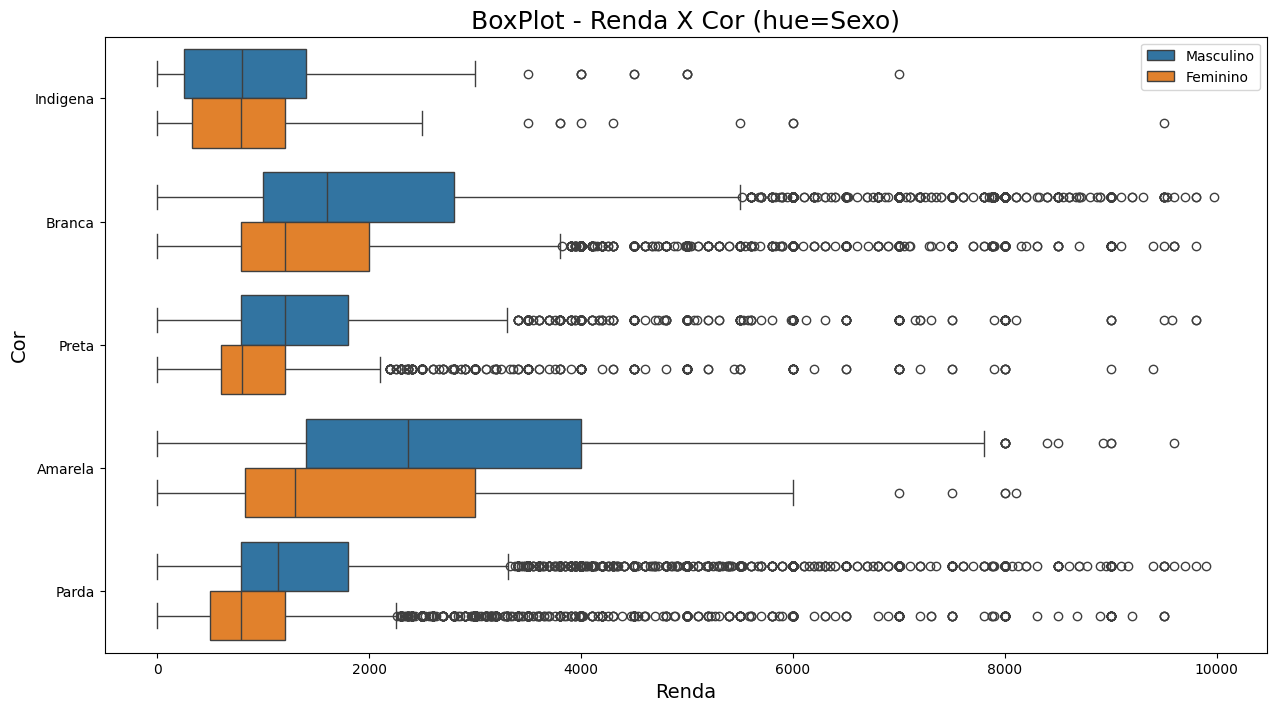

In [45]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df, x=df.query('Renda < 10000').Renda, y='Cor', orient='h', hue='Sexo')
ax.set_yticklabels(['Indigena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])
plt.title("BoxPlot - Renda X Cor (hue=Sexo)", fontsize=18)
plt.xlabel("Renda", fontsize=14)
plt.ylabel("Cor", fontsize=14)

#configurando a legenda do gráfico (sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'])

> ### Conclusões

O sexo masculino possui mediana maior em todas as cores, com exceção da etnia indígena

Para a cor preta a diferença entre sexo é a mais agressiva, sendo o terceiro quartil de renda das mulheres pretas = a mediana dos homens pretos

Mulheres nítidamente ganham menos que homens

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [46]:
from scipy import stats

percentual = stats.percentileofscore(df.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [47]:
valor = df.Renda.quantile(.99)
print(f'R${valor:.2f}')

R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [48]:
renda_estatistica_por_sexo_cor = pd.crosstab(df['Anos de Estudo'],
                                             df.Sexo,
                                             values=df.Renda,
                                             aggfunc={'mean', 'median', 'max'})
renda_estatistica_por_sexo_cor.rename(index= anos_de_estudo, inplace=True)
renda_estatistica_por_sexo_cor.rename(columns=sexo, inplace=True)
renda_estatistica_por_sexo_cor

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median           
Sexo                           Masculino Feminino  
Anos de Estudo                                     
Sem instrução e menos de 1 ano     700.0    390.0  
1 ano                              788.0    400.0  
2 anos                             788.0    450.0  
3 anos                             800.0    500.0  
4 anos                            1000.0    788.0  
5 anos                            1045.0    788.0  
6 anos                            1200.0    788.0  
7 anos                            1200.0    788.0  
8 anos                            1300.0    800.0  
9 anos                            1200.0    788.0  
10 anos                           1218.0    800.0  
11 anos                           1500.0   1000.0  
12 anos                           1800.0   1200.0  
13 anos                           2400.0   1300.0  
14 anos                           2500.0   1600.0  
15 anos ou mais                   4000.0   2800.0  
Não determinados                  1200.0    788.0

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [63]:
anos_de_estudo

{1: 'Sem instrução e menos de 1 ano',
 2: '1 ano',
 3: '2 anos',
 4: '3 anos',
 5: '4 anos',
 6: '5 anos',
 7: '6 anos',
 8: '7 anos',
 9: '8 anos',
 10: '9 anos',
 11: '10 anos',
 12: '11 anos',
 13: '12 anos',
 14: '13 anos',
 15: '14 anos',
 16: '15 anos ou mais',
 17: 'Não determinados'}

In [64]:
[values for values in anos_de_estudo.values()]

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

<ipython-input-65-5d1599f77133>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([values for values in anos_de_estudo.values()], fontsize=12)


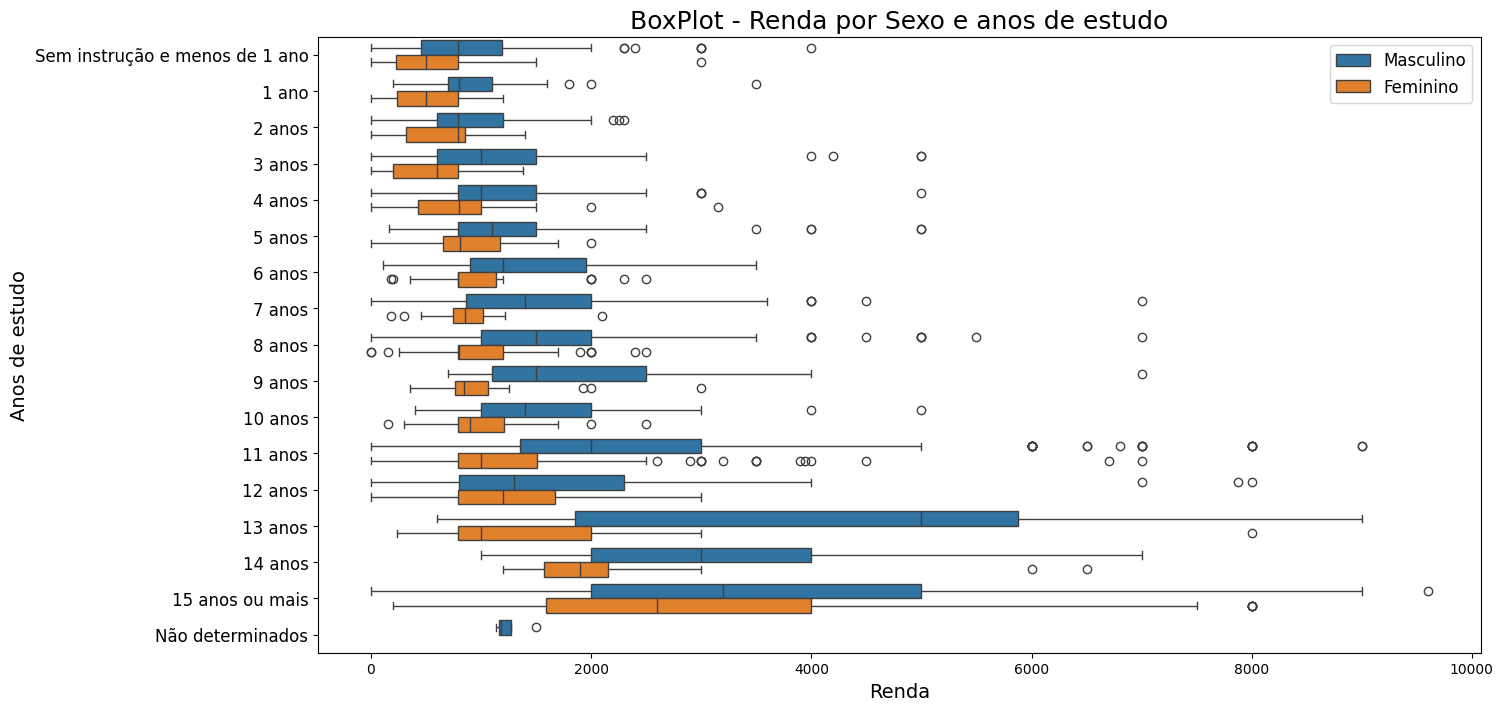

In [65]:
#plot
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df.query('Renda < 10000 and Idade ==50'), x='Renda', y='Anos de Estudo', orient='h', hue='Sexo')
#setting y ticklabels
ax.set_yticklabels([values for values in anos_de_estudo.values()], fontsize=12)
#title, x and y labels
plt.title("BoxPlot - Renda por Sexo e anos de estudo", fontsize=18)
plt.xlabel("Renda", fontsize=14)
plt.ylabel("Anos de estudo", fontsize=14)

#setting hue labels
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

> ### Conclusões

Há um aumentoda mediana de renda a medida que os anos de estudo aumentam.
Mulheres estudam mais anos para ganhar menos que homens com menor tempo de estudo.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [51]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [70]:
agg_mean_median_std = df.groupby('UF').agg({'Renda': ['mean','median','max','std']})

agg_mean_median_std.rename(index= uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [72]:
[values for values in uf.values()]

['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

<ipython-input-77-727d7b59d40a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([values for values in uf.values()], fontsize=10)


Text(0, 0.5, 'UF')

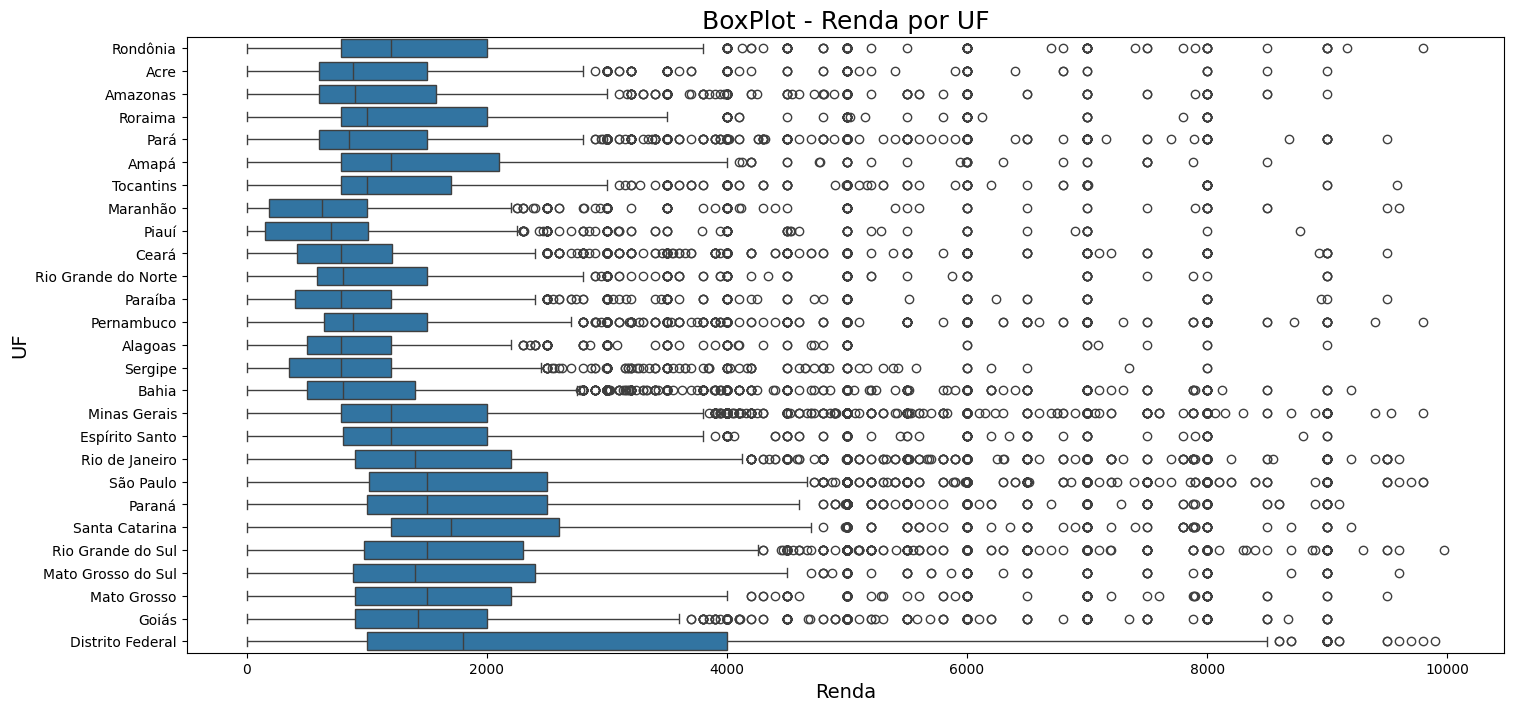

In [77]:
#plot
plt.figure(figsize=(17, 8))
ax = sns.boxplot(data=df.query('Renda < 10000'), x='Renda', y='UF', orient='h')
#setting y ticklabels
ax.set_yticklabels([values for values in uf.values()], fontsize=10)
#title, x and y labels
plt.title("BoxPlot - Renda por UF", fontsize=18)
plt.xlabel("Renda", fontsize=14)
plt.ylabel("UF", fontsize=14)

